# File benchs.py
This contains the code used to create the plots of presentations and report about the fast inference of Forests (BDT in particular)
#### Usage
Create the folder `./tmp/`, then run 
```bash
$ python bench.py
```
You can also easily tune which benchmarks you want/add more by understanding the function execute bench that can be used as:
```python
# set some fixed falues for all benchs
STD_NUM_SAMPLES = 100_000
STD_NUM_FEATURES = 5
STD_DEPTH = 3
STD_NUM_TREES = 200

# define what is constant through this benchmark
timeVSdepth = dict(
    num_samples=STD_NUM_SAMPLES,
    num_features=STD_NUM_FEATURES,
    num_trees=STD_NUM_TREES,
    data_folder=DATA_FOLDER,
    save_models=True,
)

# execute bench for a range of values. 
# Repeat the same command for other ranges & varying other values
execute_bench(
        "./tmp/timeVSmiddleEvents/",
        [1000, 5000, 10000],
        1,  # repetitions
        "num_samples",
        timeVSevents,
    )
```


In [1]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb
import timeit

import subprocess

from bench import *
from utils import *

import json # for testing jsonness
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
FIG_FOLDER = "./figures/"

In [4]:
if not os.path.exists(FIG_FOLDER):
    os.makedirs(FIG_FOLDER)

### Tests

In [5]:
def plot_labels(data_dict, bench_name, fig_folder, labels=["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"], is_xlog=False, is_ylog=False, 
                x_units=" [-]", y_units=" [ms]", scaled=False, fname_postfix="", with_error_bars=False):
    fig=plt.figure()
    for i, label in enumerate(labels):
        to_plot = data_dict["mins"][:,i]
        if scaled is True:
            to_plot = to_plot/data_dict["abscisse"]
        if with_error_bars is True:
            plt.errorbar(data_dict["abscisse"], to_plot, data_dict["stds"][:,i], linestyle='--', marker='^', label=label)
        else:
            plt.plot(data_dict["abscisse"], to_plot,"--+", label=label )
        
    bench_name.find("VS")
    y_label = bench_name[:bench_name.find("VS")]
    x_label = bench_name[bench_name.find("VS")+2:]
    
    if scaled is True:
        y_label = y_label+"/"+x_label
    plt.xlabel(x_label+x_units)
    plt.ylabel(y_label+y_units)
    
    plt.grid()
    
    if is_xlog:
        plt.xscale('log')
    if is_ylog:
        plt.yscale('log')
    plt.legend();
    plt.show()
    fig.savefig(fig_folder+bench_name+fname_postfix+".eps", format="eps")

In [6]:
def get_values_from_bench(path_to_files):
    onlyfiles = sorted([f for f in listdir(path_to_files) if isfile(join(path_to_files, f))])
    print(f"Files: {onlyfiles}")
    
    
    
    min_values = []
    std_values = []
    for file in onlyfiles:
        if file[0:3] == "std":
            std_values.append(file)
        elif file[0:3] == "0_a":
            continue
        else:
            min_values.append(file)
     
    mins_list = []
    for f in min_values:
        mins_list.append(np.load(path_to_files+f))
    mins_array = np.array(mins_list)
    
    
    stds_list = []
    for f in std_values:
        stds_list.append(np.load(path_to_files+f))
    stds = np.array(stds_list)
    
    abscisse=np.load(path_to_files+"0_abscisse.npy")
    abscisse = abscisse[:]
    
    
    
    print(f"Abscisse shape: {abscisse.shape}")
    print(f"Mins shape: {mins_array.shape}")
    print(f"Std_dev: {stds.shape}")
    
    return dict(abscisse=abscisse, mins=mins_array, stds=stds)
    

## timeVSdepth

In [8]:
bench_name = "timeVSdepth"

mypath="./tmp/"+bench_name+"/"
data_dict = get_values_from_bench(mypath)

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy']
Abscisse shape: (4,)
Mins shape: (4, 11)
Std_dev: (4, 11)


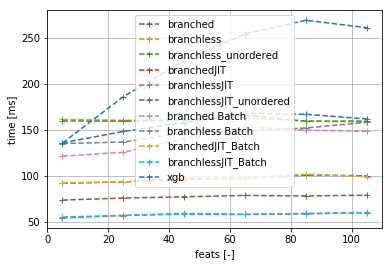

In [16]:
my_labels = ["branched", "branchless", "branchless_unordered", "branchedJIT"]
my_labels += ["branchlessJIT","branchlessJIT_unordered", "branched Batch", "branchless Batch"] 
my_labels += ["branchedJIT_Batch", "branchlessJIT_Batch", "xgb"]
             
             
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=False, is_ylog=False, scaled=False, fname_postfix="")

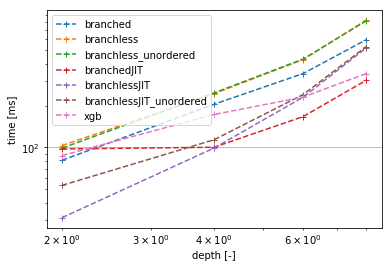

In [10]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=True, is_ylog=True, scaled=False, fname_postfix="")

# timeVSfeats

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy']
Abscisse shape: (6,)
Mins shape: (6, 11)
Std_dev: (6, 11)


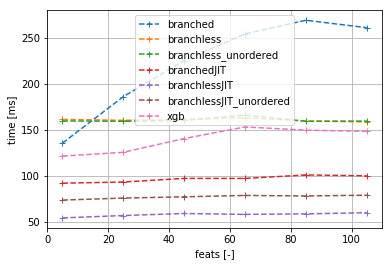

In [13]:
bench_name = "timeVSfeats"

mypath="./tmp/"+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchless_unordered", "branchedJIT", "branchlessJIT", "branchlessJIT_unordered", 
             "xgb"]
plot_labels(data_dict ,bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="")

# timeVStrees

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy']
Abscisse shape: (4,)
Mins shape: (4, 5)
Std_dev: (4, 5)


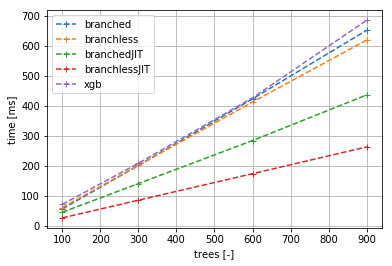

In [41]:
bench_name = "timeVStrees"

mypath="./tmp2/"+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="")

# timeVSevents

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy']
Abscisse shape: (6,)
Mins shape: (6, 5)
Std_dev: (6, 5)


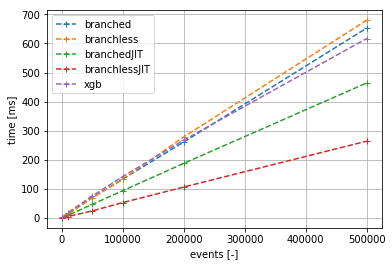

In [26]:
bench_name = "timeVSevents"

mypath="./tmp2/"+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=False ,is_ylog=False, scaled=False, fname_postfix="")

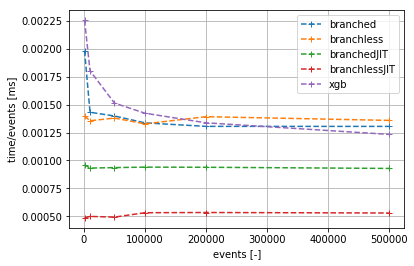

In [27]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=True, fname_postfix="_scaled")

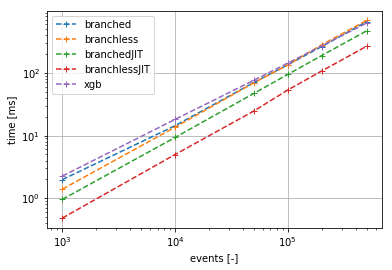

In [28]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=True ,is_ylog=True, scaled=False, fname_postfix="")

# timeVSmiddleEvents

In [8]:
bench_name = "timeVSmiddleEvents"

mypath="./tmp/"+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy']
Abscisse shape: (3,)
Mins shape: (3, 7)
Std_dev: (3, 7)


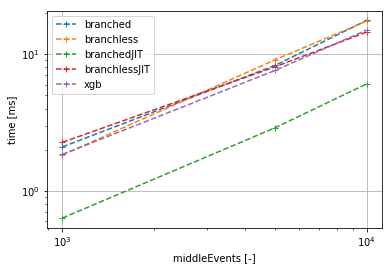

In [9]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, is_xlog=True ,is_ylog=True, scaled=False, fname_postfix="")

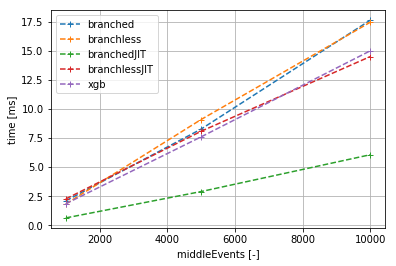

In [10]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="")

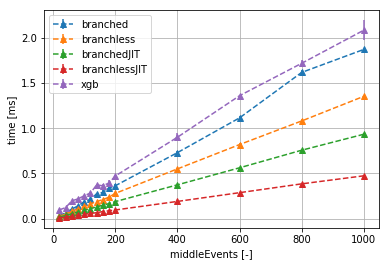

In [32]:
plot_labels(data_dict, bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="_bars", with_error_bars=True)

# timeVSfewEvents

In [49]:
bench_name = "timeVSfewEvents"

mypath="./tmp/"+bench_name+"/"
data_dict = get_values_from_bench(mypath)

my_labels = ["branched", "branchless", "branchless_unordered", "branchedJIT", "branchlessJIT", "branchlessJIT_unordered", 
             "xgb"]
plot_labels(bench_name, FIG_FOLDER, my_labels, is_xlog=True ,is_ylog=True, scaled=False, fname_postfix="_log")

Files: ['0_abscisse.npy', 'min_000_.npy', 'min_001_.npy', 'min_002_.npy', 'min_003_.npy', 'min_004_.npy', 'min_005_.npy', 'min_006_.npy', 'min_007_.npy', 'min_008_.npy', 'std_000_.npy', 'std_001_.npy', 'std_002_.npy', 'std_003_.npy', 'std_004_.npy', 'std_005_.npy', 'std_006_.npy', 'std_007_.npy', 'std_008_.npy']
Abscisse shape: (9,)
Mins shape: (9, 5)
Std_dev: (9, 5)


TypeError: string indices must be integers

<Figure size 432x288 with 0 Axes>

In [48]:
plot_labels(bench_name, FIG_FOLDER, my_labels, scaled=False, fname_postfix="", with_error_bars=True)

TypeError: string indices must be integers

<Figure size 432x288 with 0 Axes>

# --- End benchs ---

# Old code

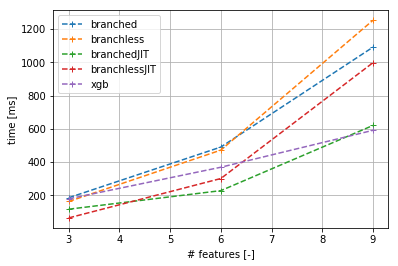

In [320]:
fig=plt.figure()
#plt.errorbar(abscisse, to_plot[:,0], stds[:,0], linestyle='None', marker='^')
labels=["branched", "branchless", "branchedJIT", "branchlessJIT", "xgb"]
for i, label in enumerate(labels):
    plt.plot(data_dict["abscisse"], data_dict["mins"][:,i],"--+", label=label )
plt.xlabel("# features [-]")
plt.ylabel("time [ms]")
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.legend();
plt.show()
fig.savefig(FIG_FOLDER+"xgboost_events.pdf", format="pdf")

IndexError: index 4 is out of bounds for axis 1 with size 2

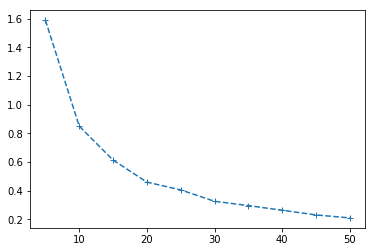

In [237]:
fig=plt.figure()
#plt.errorbar(abscisse, to_plot[:,0], stds[:,0], linestyle='None', marker='^')
plt.plot(abscisse, to_plot[:,0]/abscisse,"--+", label="unique" )
# plt.plot(abscisse, to_plot[:,1]/abscisse,"--+", label="unique clever" )
# plt.plot(abscisse, to_plot[:,2]/abscisse,"--+", label="unique batch" )
# plt.plot(abscisse, to_plot[:,3]/abscisse,"--+", label="unique batch clever" )
plt.plot(abscisse, to_plot[:,4]/abscisse,"--+", label="unique_batch_good" )
plt.plot(abscisse, to_plot[:,5]/abscisse,"--+r", label="unique_batch_good_ordered" )

#plt.plot(abscisse, to_plot[:,6]/abscisse,"--+", label="array" )
#plt.plot(abscisse, to_plot[:,7],"--+", label="JIT_forest" )
#plt.plot(abscisse, to_plot[:,8],"--+", label="JIT_forest_clever" )
#plt.plot(abscisse, to_plot[:,9],"--+", label="JIT_all" )
#plt.plot(abscisse, to_plot[:,9]/abscisse,"--+", label="Static" )
plt.plot(abscisse, to_plot[:,11]/abscisse,"--+k", label="xgboost" )

plt.xlabel("#events [-]")
plt.ylabel("time/event [ms]")
plt.grid()
#plt.xscale('log')
#plt.yscale('log')
plt.legend()



In [84]:
to_plot[0,[1,2]]

array([0.52389296, 5.17142086])

In [86]:
to_plot.shape

(14, 3)

In [93]:
np.min(np.stack([to_plot, to_plot, to_plot]), axis=0).shape

(14, 3)